In [58]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('Housing.csv')

# Show first rows to check
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [59]:
#DATA PREPROCESSING
print("Missing values per column:")
print(df.isnull().sum())

# Drop missing if any
df = df.dropna()

# Categorical features to encode
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("Shape after encoding:", df_encoded.shape)

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Shape after encoding: (545, 14)


In [60]:
#SIMPLE LINEAR REGRESSION
X_simple = df[['area']]  # only 'area' feature
y_simple = df['price']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

In [62]:
#TRAINING & EVALUATING SIMPLE LINEAR REGRESSION
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

y_pred_simple = model_simple.predict(X_test_simple)

print("Simple Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_simple, y_pred_simple))
print("MSE:", mean_squared_error(y_test_simple, y_pred_simple))
print("R2 Score:", r2_score(y_test_simple, y_pred_simple))

print("Coefficient (slope):", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)

Simple Linear Regression Metrics:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R2 Score: 0.27287851871974644
Coefficient (slope): 425.72984193878284
Intercept: 2512254.2639593435


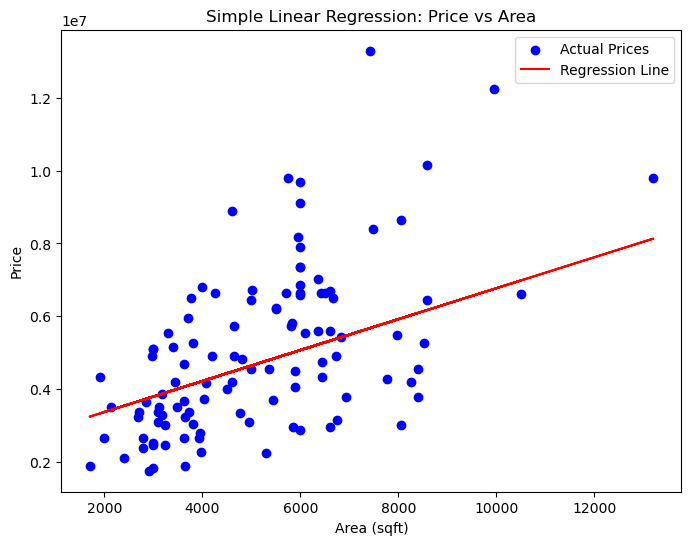

In [64]:
#PLOTTING 
plt.figure(figsize=(8,6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.savefig('simple_linear_regression.png')
plt.show()

In [66]:
#PREPARIND DATA FOR MULTIPLE LINEAR REGRESSION
X_multi = df_encoded.drop('price', axis=1)
y_multi = df_encoded['price']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

In [67]:
#FEATURE SCALING
# Scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

In [70]:
#RIDGE REGRESSION (MULTIPLE LINEAR REGRESSION WITH REGULARIZATION)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_multi)

y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_multi, y_pred_ridge))
print("MSE:", mean_squared_error(y_test_multi, y_pred_ridge))
print("R2 Score:", r2_score(y_test_multi, y_pred_ridge))

Ridge Regression Metrics:
MAE: 969857.9028478259
MSE: 1754839327446.8074
R2 Score: 0.6528212603810125


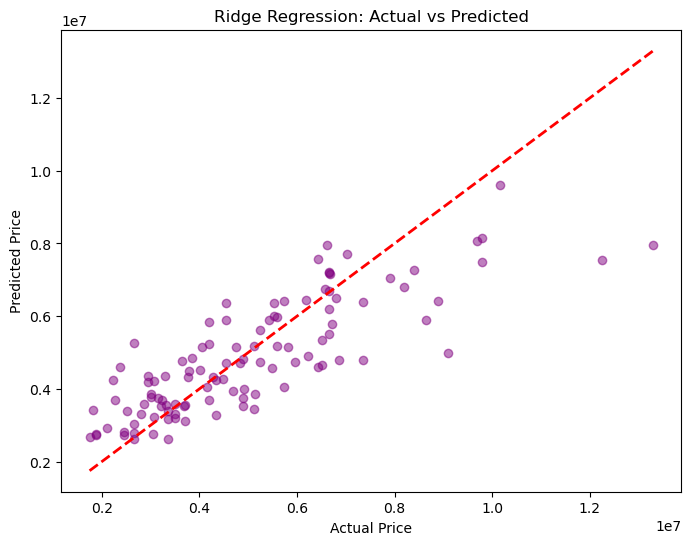

In [79]:
#PLOTTING
# PLOTTING for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, y_pred_ridge, alpha=0.5, color='purple')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted")
plt.savefig("ridge_regression_prediction.png")
plt.show()

In [74]:
#POLYNOMIAL FEATURES + LINEAR REGRESSION
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_multi)

y_pred_poly = poly_model.predict(X_test_poly)

print("Polynomial Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_multi, y_pred_poly))
print("MSE:", mean_squared_error(y_test_multi, y_pred_poly))
print("R2 Score:", r2_score(y_test_multi, y_pred_poly))

Polynomial Regression Metrics:
MAE: 970043.4039201644
MSE: 1754318687330.6682
R2 Score: 0.6529242642153175


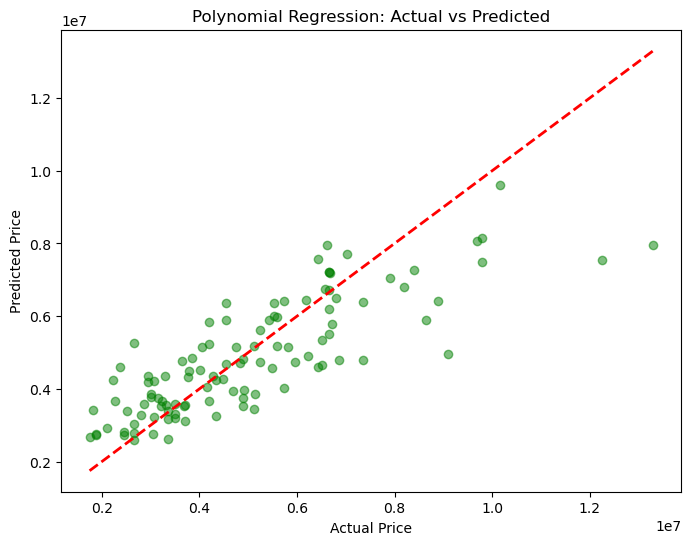

In [75]:
#PLOTTING
plt.figure(figsize=(8,6))
plt.scatter(y_test_multi, y_pred_poly, alpha=0.5, color='green')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.savefig("poly_regression_actual_vs_pred.png")
plt.show()

In [47]:
#MULTIPLE LINEAR REGRESSION
# Selecting numerical features for multiple regression
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Define features and target
X_multi = df_encoded.drop('price', axis=1)
y = df_encoded['price']


# Train-test splitting
X_train_multi, X_test_multi, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42)


In [48]:
#TRAINING & EVALUATING MULTIPLE LINEAR REGRESSION
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

y_pred_multi = model_multi.predict(X_test_multi)

mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression Metrics (with encoded features):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Coefficients
coefficients = pd.Series(model_multi.coef_, index=X_multi.columns)
print("\nFeature Coefficients:")
print(coefficients.sort_values(ascending=False))

Multiple Linear Regression Metrics (with encoded features):
MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.6529

Feature Coefficients:
bathrooms                          1.094445e+06
airconditioning_yes                7.914267e+05
hotwaterheating_yes                6.846499e+05
prefarea_yes                       6.298906e+05
stories                            4.074766e+05
basement_yes                       3.902512e+05
mainroad_yes                       3.679199e+05
guestroom_yes                      2.316100e+05
parking                            2.248419e+05
bedrooms                           7.677870e+04
area                               2.359688e+02
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


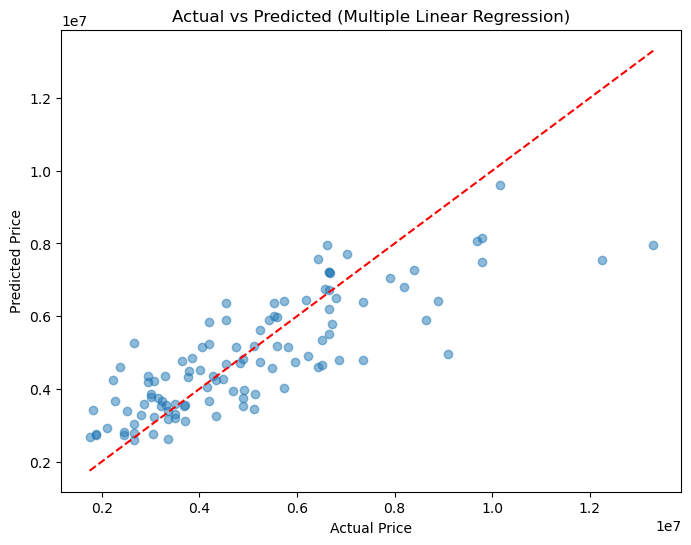

In [49]:
#PLOTTING
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.savefig("multi_regression_prediction.png")
plt.show()